# Analyze mdp gro info

## Import packages

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import yaml

# Update font size for graphics
plt.rcParams.update({'font.size': 20})

## Load data

In [7]:
mdp_df = pd.read_csv("../data/gromacs_mdp_files_info.tsv", sep="\t")
print(mdp_df.shape)
mdp_df.head()

(628, 8)


,dataset_origin,dataset_id,dt,nsteps,temperature,barostat,thermostat,filename
0,zenodo,44622,0.002,30000000.0,298.0,Berendsen,v-rescale,pzpc.mdp
1,zenodo,16294,0.002,40000000.0,300.0,berendsen,berendsen,TI.mdp
2,zenodo,247203,0.002,50000000.0,310.0,no,Nose-Hoover,charmm-mono.mdp
3,zenodo,51639,0.002,500000.0,323.0,berendsen,berendsen,tap06W.mdp
4,zenodo,1423112,0.002,500000000.0,310.0,Parrinello-Rahman,Nose-Hoover,01-CER160_9_POPC_512_NaCl_150mM_310K_md_mdout.mdp


In [8]:
gro_df = pd.read_csv("../data/gromacs_gro_files_info.tsv", sep="\t")
print(gro_df.shape)
gro_df.head()

(1779, 7)


,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,filename
0,zenodo,44622,28178,False,False,True,start.gro
1,zenodo,44622,28178,False,False,True,pzpcRUN.gro
2,zenodo,44622,28178,False,False,True,pzpcRUN2.gro
3,zenodo,16294,4752,False,False,True,init2_TI5.gro
4,zenodo,247203,44752,False,False,True,md110.gro


## MDP files

## GRO files

### Proteins, lipids and nucleic acids

In [21]:
print(f"Total number of gro files: {gro_df.shape[0]}")
print(f"Number of gro files with protein: {gro_df.query('has_protein==True').shape[0]}")
print(f"Number of gro files with lipid: {gro_df.query('has_lipid==True').shape[0]}")
print(f"Number of gro files with nucleic acid: {gro_df.query('has_nucleic==True').shape[0]}")
print(f"Number of gro files with protein and lipid: {gro_df.query('has_protein==True').query('has_lipid==True').shape[0]}")
print(f"Number of gro files with protein and nucleic acid: {gro_df.query('has_protein==True').query('has_nucleic==True').shape[0]}")
print(f"Number of gro files with lipid and nucleic acid: {gro_df.query('has_lipid==True').query('has_nucleic==True').shape[0]}")

Total number of gro files: 1779
Number of gro files with protein: 634
Number of gro files with lipid: 1371
Number of gro files with nucleic acid: 5
Number of gro files with protein and lipid: 293
Number of gro files with protein and nucleic acid: 2
Number of gro files with lipid and nucleic acid: 0


In [20]:
gro_df.query('has_lipid==False').query('has_protein==False').query('has_nucleic==False')

,dataset_origin,dataset_id,atom_number,has_protein,has_nucleic,has_lipid,filename
246,zenodo,32144,28350,False,False,False,run.gro
390,zenodo,3888436,60156,False,False,False,NOION_SPCE.gro
391,zenodo,3888436,57042,False,False,False,CA_2251_SPCE_FULL.gro
392,zenodo,3888436,62548,False,False,False,NA_3311_SPCE_FULL.gro
393,zenodo,3888436,61950,False,False,False,NA_2483_SPCE_FULL.gro
...,...,...,...,...,...,...,...
1603,zenodo,3888383,60754,False,False,False,NA_828_SPCE.gro
1604,zenodo,3888383,57042,False,False,False,CA_2251_SPCE.gro
1605,zenodo,3888383,59265,False,False,False,CA_4502_SPCE.gro
1606,zenodo,3888383,58155,False,False,False,CA_3378_SPCE.gro


### Système size

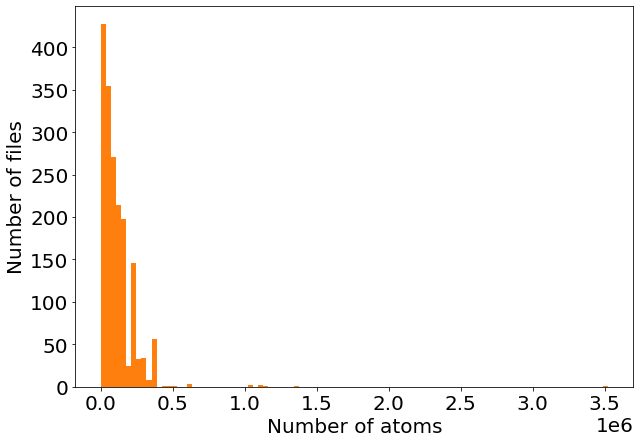

In [18]:
plt.figure(figsize=(10,7))
plt.hist(gro_df["atom_number"],
         bins=100,
         color="tab:orange")
plt.xlabel("Number of atoms")
plt.ylabel("Number of files")
plt.savefig("gromacs_gro_system_size_distribution.png", dpi=300, bbox_inches="tight")
plt.savefig("gromacs_gro_system_size_distribution.svg", bbox_inches="tight")